In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.ioff()
import seaborn as sns
sns.set_style("whitegrid")
from scipy import stats, integrate
from scipy.stats import kendalltau

import warnings
warnings.filterwarnings('ignore')

# %matplotlib notebook

plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['figure.dpi'] = 150
plt.rcParams['grid.linestyle'] = '-'
plt.rcParams['font.size'] = 4.0

In [2]:
df_atti = pd.read_pickle('../../data/atti_dirigenti.pkl')

# Analysis of the Dataset

From the dataset we can see that:
- there are duplicates for CODICE_PRATICA


In [3]:
df_atti.describe(include='all')

,CODICE_PRATICA,DATA_ATTO,DESCRIZIONE,DESCRIZIONE_TIPO_ATTO,DESCRIZIONE_TIPO_PRATICA,ID_TIPO_PRATICA,LINK_CONTENUTO_BINARIO,OGGETTO,PERSONA,STATUS,UFFICIO_AC,UFFICIO_DG,UFFICIO_SE,publisher
count,156239,156239,156239,156239,156239,156239,156239,156239,156239,156239,156239,156239,156239,156150
unique,156189,4600,16,4,1,1,134381,151695,389,2,353,43,856,12
top,20010026002001AD00000003202,2016-07-19,Atto pubblicato su Banca Dati (PBD),Decreto soggetto a controllo congiunto,Atto dei dirigenti,MON,http://www.regione.toscana.it/bancadati/atti/C...,"L.r. 55/2006 - ""Interventi in favore delle vit...",005549,2,00000,50073,0,iText 2.1.7 by 1T3XT; modified using iText® 5....
freq,2,256,46456,62872,156239,156239,21816,414,8686,156237,48394,13830,29063,57834


In [4]:
df_atti['DATA_ATTO'] = pd.to_datetime(df_atti.DATA_ATTO)

### Duplicates

In [5]:
duplicates = df_atti['CODICE_PRATICA'].value_counts()[df_atti['CODICE_PRATICA'].value_counts() > 1]
print(duplicates.shape)
duplicates[:10]

(50,)


20010026002001AD00000003202    2
20140002002014AD00000000154    2
20000024002000AD00000002714    2
20010002002001AD00000000253    2
20130034002013AD004341         2
20000046002000AD00000005290    2
20120026002012AD00000002813    2
20000002002000AD00000000031    2
20090002002009AD00000000128    2
20060002002006AD00000000268    2
Name: CODICE_PRATICA, dtype: int64

In [6]:
df_atti[df_atti['CODICE_PRATICA'] == '20010036002001AD00000004022']

,CODICE_PRATICA,DATA_ATTO,DESCRIZIONE,DESCRIZIONE_TIPO_ATTO,DESCRIZIONE_TIPO_PRATICA,ID_TIPO_PRATICA,LINK_CONTENUTO_BINARIO,OGGETTO,PERSONA,STATUS,UFFICIO_AC,UFFICIO_DG,UFFICIO_SE,publisher
199,20010036002001AD00000004022,2001-06-19,Atto soggetto a pubblicazione per estratto (PEDP),Decreto soggetto a controllo congiunto,Atto dei dirigenti,MON,http://www.regione.toscana.it/bancadati/atti/C...,"Legge n.457/78 art.36 e Legge 17.2.1992 n.179,...",014276,2,01049,01937,0,LibreOffice 5.1
0,20010036002001AD00000004022,2001-06-19,Atto soggetto a pubblicazione per estratto (PEDP),Decreto soggetto a controllo congiunto,Atto dei dirigenti,MON,http://www.regione.toscana.it/bancadati/atti/C...,"Legge n.457/78 art.36 e Legge 17.2.1992 n.179,...",014276,2,01049,01937,0,LibreOffice 5.1


We can safely drop all the duplicates

In [7]:
df_atti.drop_duplicates(subset=['CODICE_PRATICA'], inplace=True)

In [8]:
df_atti.shape

(156189, 14)

### Exploration over Uffici

In [11]:
df_uffici = pd.read_csv('../../data/dg_struttura.csv')

In [12]:
def count_documents_per_office(by):
    df_uffici = pd.read_csv('../../data/dg_struttura.csv')
    count_uffici = df_atti[by].value_counts()
    return pd.DataFrame(count_uffici)

In [13]:
df_uffici_dg = count_documents_per_office('UFFICIO_DG')
df_uffici_dg

,UFFICIO_DG
50073,13825
50117,13592
50003,9724
50004,9681
50000,8290
50005,7479
01937,7160
50118,6841
50079,6058
50006,6021


In [16]:
df_uffici_ac = count_documents_per_office('UFFICIO_AC')
df_uffici_ac

,UFFICIO_AC
00000,48387
0,11099
50078,4638
50000,4010
50001,3809
50022,3437
50019,3168
50074,2589
50002,2497
50076,2406


### Merge Duplicate Offices

In [17]:
to_replace = {
    '50001': '50115',
    '50069': '50115',
    '50102': '50115',
    '50083': '50004',
    '50079': '50116',
    '50118': '50202',
    '50121': '50201'
}

In [18]:
df_atti['UFFICIO_DG'] = df_atti['UFFICIO_DG'].replace(to_replace)
df_atti['UFFICIO_AC'] = df_atti['UFFICIO_AC'].replace(to_replace)

## Check the distribution of the other labels

In [19]:
df_atti.DESCRIZIONE.value_counts()

Atto pubblicato su Banca Dati (PBD)                                                    46452
Atto soggetto a pubblicazione su Banca Dati (PBD)                                      31702
Atto soggetto a pubblicazione per estratto                                             27321
Atto soggetto a pubblicazione per estratto (PEDP)                                      11201
Diffusione telematica                                                                   9600
Atto soggetto a pubblicazione integrale                                                 7279
Atto soggetto a pubblicazione integrale (PBURT/BD)                                      6213
Atto pubblicato su BURT e Banca Dati (PBURT/PBD)                                        5811
Atto non soggetto a pubblicità                                                          3709
Atto riservato escluso da pubblicità (RE)                                               1964
Atto non pubblicato (NP)                                              

In [20]:
df_atti.DESCRIZIONE_TIPO_ATTO.value_counts()

Decreto soggetto a controllo congiunto              62854
Decreto non soggetto a controllo interno            54674
Decreto soggetto a solo controllo contabile         30998
Decreto soggetto a solo controllo amministrativo     7663
Name: DESCRIZIONE_TIPO_ATTO, dtype: int64

In [21]:
df_atti.DESCRIZIONE_TIPO_PRATICA.value_counts()

Atto dei dirigenti    156189
Name: DESCRIZIONE_TIPO_PRATICA, dtype: int64

In [22]:
df_atti.PERSONA.value_counts()

005549     8684
020411     4578
005045     3816
015534     3806
007505     3113
014002     2653
013692     2121
005642     2013
005070     1943
017792     1886
013910     1743
007108     1619
005595     1613
014867     1584
007115     1579
020074     1567
014233     1563
015654     1532
005737     1495
002157     1458
001398     1408
016472     1382
005720     1314
014115     1301
012608     1237
008430     1219
014063     1208
015618     1202
002947     1190
016237     1140
           ... 
008034        5
012716        5
004012        4
003035        4
015751        4
007237        4
004978        3
001858        3
0015464       3
008382        3
015051        3
002139        3
011919        3
010252        2
003290        2
003256        2
005736        2
012411        2
001835        2
004120        1
014462        1
0008073       1
001579        1
002104        1
007608        1
0015653       1
011569        1
0010826       1
015769        1
001220        1
Name: PERSONA, Length: 3

In [23]:
df_atti.STATUS.value_counts()

2     156188
41         1
Name: STATUS, dtype: int64

### Name the offices

In [24]:
df_atti.columns

Index(['CODICE_PRATICA', 'DATA_ATTO', 'DESCRIZIONE', 'DESCRIZIONE_TIPO_ATTO',
       'DESCRIZIONE_TIPO_PRATICA', 'ID_TIPO_PRATICA', 'LINK_CONTENUTO_BINARIO',
       'OGGETTO', 'PERSONA', 'STATUS', 'UFFICIO_AC', 'UFFICIO_DG',
       'UFFICIO_SE', 'publisher'],
      dtype='object')

## Data Exploration

As first step we want visualize the distrubition of the acts per:
- year
- employee
- office
    
### Acts Per Year

In [25]:
def label_rotation(ax, angle):
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    return ax

In [26]:
df = df_atti

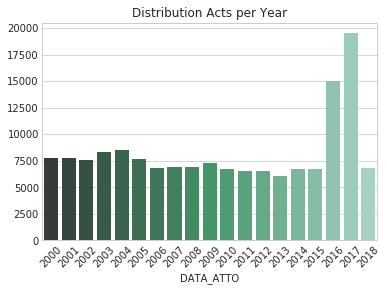

In [27]:
acts_per_year = df.groupby([df['DATA_ATTO'].dt.year])['CODICE_PRATICA'].count()

fig, ax = plt.subplots()
sns.barplot(acts_per_year.index, acts_per_year.values, palette="BuGn_d", ax=ax)
label_rotation(ax, 45)
plt.title('Distribution Acts per Year')
plt.show(fig)

The distribution of the acts per year shows that there is an increase of acts for the years 2016 and 2017.
This is because in 2016 there was a grouping of the regional districts.

From another point of view is interesting to see the distribution of acts per person.

### Acts Per Employee

acts distribution per person


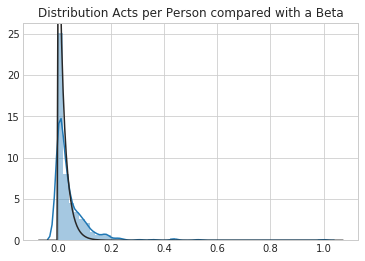

In [28]:
print('acts distribution per person')
acts_per_person = df.groupby([df['PERSONA']])['CODICE_PRATICA'].count().sort_values(ascending=False)

acts_per_person_scaled = (acts_per_person - acts_per_person.min()) / (acts_per_person.max() - acts_per_person.min())

fig, ax = plt.subplots()
sns.distplot(acts_per_person_scaled.values, kde=True, rug=False, ax=ax, fit=stats.beta)
plt.title('Distribution Acts per Person compared with a Beta')
plt.show()

### Distribution of Acts per Office

from here we can see what are the most active offices

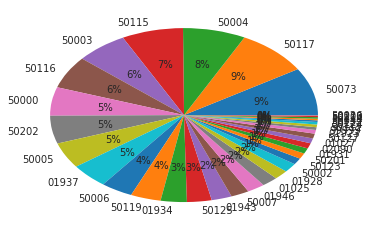

In [29]:
df_act_office = df.groupby(df['UFFICIO_DG'])['CODICE_PRATICA'].count()
df_act_office /= df_act_office.sum()
top = df_act_office.sort_values(ascending=False)
plt.pie(top, labels=top.index, autopct='%1.f%%')
plt.show()

In [30]:
top[:33]

UFFICIO_DG
50073    0.088515
50117    0.087023
50004    0.075678
50115    0.074205
50003    0.062258
50116    0.060491
50000    0.053077
50202    0.051828
50005    0.047884
01937    0.045842
50006    0.038549
50119    0.036571
01934    0.031520
50125    0.029804
01943    0.024541
50007    0.021967
01946    0.021429
01025    0.019400
01928    0.017351
50002    0.016800
50123    0.011845
50201    0.010647
01931    0.010129
02090    0.010014
01027    0.009245
50127    0.009028
01923    0.006947
99999    0.005058
50112    0.004994
50124    0.004719
50122    0.002977
50044    0.002971
50114    0.002926
Name: CODICE_PRATICA, dtype: float64

In [31]:
group_office_year = df.groupby(by=[df['UFFICIO_DG'], df['DATA_ATTO'].dt.year])['CODICE_PRATICA'].count()

As final exploration it would be interesting to see for the top person what is the distributions of acts per year

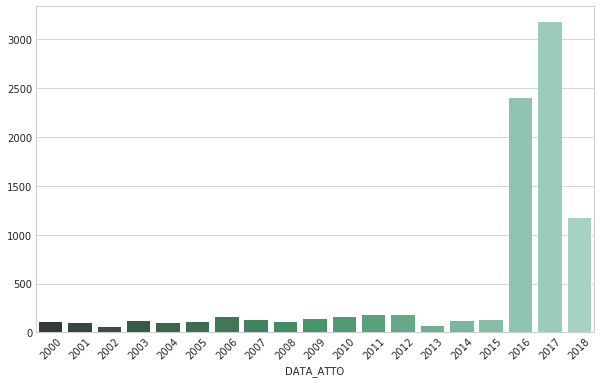

In [32]:
df_person = df[df['PERSONA'] == '005549']
acts_per_year_person = df_person.groupby([df_person['DATA_ATTO'].dt.year])['CODICE_PRATICA'].count()

fig, ax = plt.subplots()
sns.barplot(acts_per_year_person.index, acts_per_year_person.values, palette="BuGn_d", 
            ax=ax, order=acts_per_year_person.index)
label_rotation(ax, 45)
fig.set_size_inches(10,6)
plt.show(fig)

Moreover, we can see that he works for different offices

In [33]:
df_person = df[df['PERSONA'] == '005549']

Here we can see that apart 2016 and 2017 this person did in average the same number of acts.

It would be interesting to see the contribution of each person per office in order to spot:
- when a person moves from one office to another
- Who is in charge of an office (considering that if a person is in charge sign more acts than the others)

## Next Step

After the data exploration the next steps of this notebook is to write a classification model able to predict the office that writes the act given the text in the subject (Oggetto) attribute.